<div style="text-align: center; background-color: lightblue; padding: 15px;">
    <p style="text-align: center;">بسم الله، والحمد لله، والصلاة والسلام على رسول الله وعلى آله وصحبه</p>
</div>

<div style="border: 2px solid black; padding: 10px;">
    <h2 style="text-align: center;">ADABOOST</h2>
    <p><strong>PREPARE PAR LES ELEVES INGENIEURS:</strong></p>
    <ul>
        <li>ADIL ELMISSAOUI</li>
        <li>MOHAMED EL-BADRI</li>
    </ul>
</div>

In [10]:
%reset -f
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer

<div class="note" style="background-color: lightyellow; color: black; padding: 10px;">
  <h4> TASK 1- Preprocessing of NetCDF files using Xarray library and conversion to DataFrame : </h4>
</div>

In [2]:
file_link="/home/mohamed/EHTPIII/IA_METEO/PROJET/data/DATA.grib"

In [3]:
# DATA_1=xr.open_dataset(file_link,engine='cfgrib',
#                        backend_kwargs={"filter_by_keys" : {"shortName": ["u10","v10","d2m","t2m","msl","tcc","blh","cape","tco3"]}})
# DATA_1["time"]=pd.to_datetime(DATA_1.time).normalize()

In [4]:
# DATA_2=xr.open_dataset(file_link,engine='cfgrib',
#                       backend_kwargs={"filter_by_keys" : {"paramId":[228 ,143,142,228001]}})

# DATA_2["time"]=pd.to_datetime(DATA_2.time).normalize()

In [11]:
file_link1="/kaggle/input/hourly-reanalysis-data-for-morocco/data_stream-oper_stepType-accum.nc"
file_link2="/kaggle/input/hourly-reanalysis-data-for-morocco/data_stream-oper_stepType-instant.nc"

In [12]:
DATA_1=xr.open_dataset(file_link1)
DATA_2=xr.open_dataset(file_link2)

In [13]:
DF_1=DATA_1.to_dataframe()

In [14]:
DF_2=DATA_2.to_dataframe()

In [15]:
DF_1.drop(columns=["number","expver"],inplace=True)

In [16]:
DF_2.drop(columns=["number","expver"],inplace=True)

In [17]:
DF=pd.merge(DF_1,DF_2,left_index=True, right_index=True, how='left')

In [12]:
# DF.drop(columns=["expver_x","number_x","number_y","expver_y"],inplace=True)

In [18]:
DF

tp            cp  \
valid_time          latitude longitude                               
2024-07-01 00:00:00 40.0     -20.00     4.768372e-07  0.000000e+00   
                             -19.75     9.536743e-07  4.768372e-07   
                             -19.50     4.768372e-07  4.768372e-07   
                             -19.25     1.907349e-05  1.835823e-05   
                             -19.00     1.382828e-05  1.168251e-05   
...                                              ...           ...   
2024-09-30 23:00:00 20.0      2.00      0.000000e+00  0.000000e+00   
                              2.25      0.000000e+00  0.000000e+00   
                              2.50      0.000000e+00  0.000000e+00   
                              2.75      0.000000e+00  0.000000e+00   
                              3.00      0.000000e+00  0.000000e+00   

                                                 lsp       u10       v10  \
valid_time          latitude longitude                                     
2024-07-01 00:00:00 40.0     -20.00     4.768372e-07 -2.869888 -5.816299   
                             -19.75     4.768372e-07 -3.067154 -6.015518   
                             -19.50     0.000000e+00 -3.329849 -6.096573   
                             -19.25     4.768372e-07 -3.477310 -6.078995   
                             -19.00     1.907349e-06 -3.536880 -6.069229   
...                                              ...       ...       ...   
2024-09-30 23:00:00 20.0      2.00      0.000000e+00 -5.842407  0.208557   
                              2.25      0.000000e+00 -5.698853 -0.293396   
                              2.50      0.000000e+00 -5.430298 -0.684021   
                              2.75      0.000000e+00 -4.949829 -1.072693   
                              3.00      0.000000e+00 -4.627563 -1.371521   

                                               d2m         t2m          msl  \
valid_time          latitude longitude                                        
2024-07-01 00:00:00 40.0     -20.00     286.035645  291.378662  102749.2500   
                             -19.75     286.553223  291.425537  102731.5000   
                             -19.50     287.137207  291.411865  102715.0000   
                             -19.25     287.316895  291.345459  102699.2500   
                             -19.00     287.465332  291.273193  102684.7500   
...                                            ...         ...          ...   
2024-09-30 23:00:00 20.0      2.00      278.072754  304.687500  101030.9375   
                              2.25      277.918457  304.048828  101075.1875   
                              2.50      277.773926  303.687500  101106.1875   
                              2.75      277.715332  303.687500  101101.9375   
                              3.00      277.605957  303.781250  101087.6875   

                                             tcc         blh   cape  cin  \
valid_time          latitude longitude                                     
2024-07-01 00:00:00 40.0     -20.00     0.387207  932.052551   6.75  NaN   
                             -19.75     0.403412  874.927551  10.25  NaN   
                             -19.50     0.417297  803.177551  15.00  NaN   
                             -19.25     0.662109  802.677551  18.75  NaN   
                             -19.00     0.855743  811.927551  24.75  NaN   
...                                          ...         ...    ...  ...   
2024-09-30 23:00:00 20.0      2.00      0.000000  493.644714   0.00  NaN   
                              2.25      0.000000  479.644714   0.00  NaN   
                              2.50      0.000000  470.644714   0.00  NaN   
                              2.75      0.000000  431.269714   0.00  NaN   
                              3.00      0.000000  402.269714   0.00  NaN   

                                            tco3  
valid_time          latitude longitude            
2024-07-01 00:00:00 40.0     -2

In [19]:
del DF_1 , DF_2 , DATA_1 , DATA_2

<div class="note" style="background-color: lightyellow; color: black; padding: 10px;">
  <h4> TASK 2 : EDA </h4>
</div>

<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 1. General EDA. </h4>
</div>

In [20]:
def EDA(DATA):
    print("this is the EDA phase \n")
    print("----------------------------------------------------------------------------------")
    print("DATA DESCRIPTION : \n")
    print(DATA.describe())
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
    

    print("DATA INFORMATION : \n")
    print(DATA.info())
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")

    print("THERE IS ANY NAN VALUE ? : \n")
    print(DATA.isnull().any())
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")

    print("THE NUMBER OF NAN VALUES  : \n")
    print(DATA.isnull().sum())
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")

    print("THERE IS ANY DUPLICATED ROWS : \n")
    print(DATA.duplicated().any())
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")



    print("THE NUMBER OF DUPLICATED ROWS : \n")
    print(DATA.duplicated().sum())
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")



    # print("THE VISUALIZATION IS : \n")
    # plt.figure(figsize=(25,15))
    # sns.heatmap(DATA.corr(),annot=True)
    # plt.title("CORRELATION HEATMAP")


    # plt.figure(figsize=(20,10))
    # sns.pairplot(DATA)
    # plt.title("PAIRPLOTS HEATMAP")



    # plt.figure(figsize=(20,8))
    # sns.boxplot(DATA)
    # plt.title("BOXPLOTS")

In [21]:
EDA(DF)

this is the EDA phase 

----------------------------------------------------------------------------------
DATA DESCRIPTION : 

                 tp            cp           lsp           u10           v10  \
count  1.663286e+07  1.663286e+07  1.663286e+07  1.663286e+07  1.663286e+07   
mean   1.016706e-05  7.305419e-06  2.862490e-06 -8.509224e-01 -2.590449e+00   
std    1.127629e-04  9.123903e-05  4.963950e-05  3.141278e+00  3.966104e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00 -1.521875e+01 -1.680579e+01   
25%    0.000000e+00  0.000000e+00  0.000000e+00 -3.079453e+00 -5.725681e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00 -8.513336e-01 -2.498810e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  1.321671e+00  3.913574e-01   
max    1.678848e-02  1.198339e-02  1.547241e-02  1.392499e+01  1.222527e+01   

                d2m           t2m           msl           tcc           blh  \
count  1.663286e+07  1.663286e+07  1.663286e+07  1.663286e+07  1.663286e+07   
me

<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 2. Box Plot. </h4>
</div>

<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p>the dataset is too large to plot the boxplot, thus we'll take a sample and visualize the boxplot for it.
    </p>
</div>


In [19]:
min_scaler=MinMaxScaler()
DF_S=min_scaler.fit_transform(DF.loc[:,"tp":"tco3"])
DF_S=pd.DataFrame(DF_S,columns=DF.columns,index=DF.index)

<Axes: >

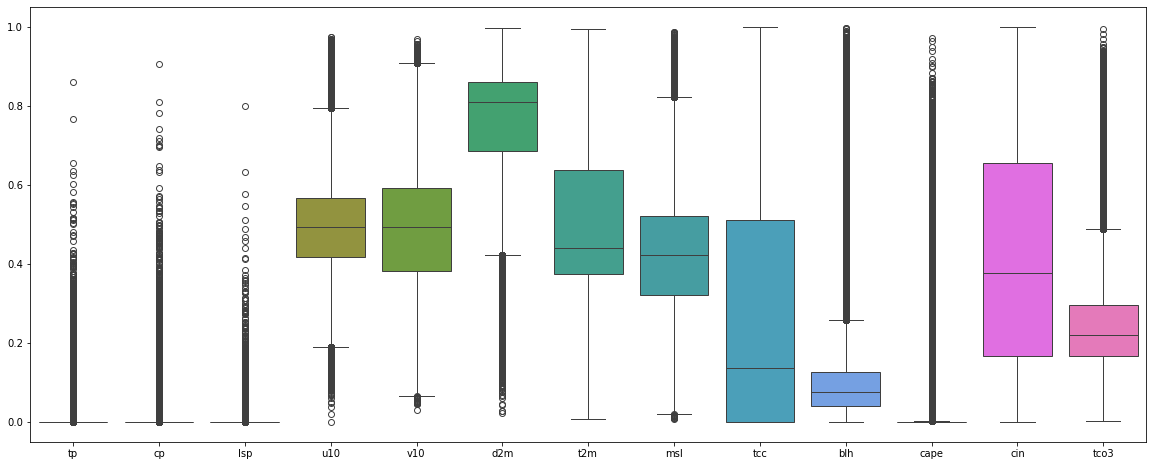

In [22]:
DF_SAMPLE=DF_S.sample(frac=0.1,random_state=1)
plt.figure(figsize=(20,8))
sns.boxplot(DF_SAMPLE)

<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p>
        <big> MEDIAN :</big> <br>
        <i>&bull; the Dew Point has the highest median,then high moisture content in the air.</i> <br>
        <i>&bull; the median of u10, v10 , cin and t2m indicates that the values are evenly distributed around the middle of the range (to check).</i>. <br>
        <i>&bull; Boundary Layer Height and Total Column O3 have low median and the other variables have very low median</i> <br>
        <big> OUTLIERS :</big> <br>
        <i>&bull; for tp, cp, lsp and cape, we have a lot of outliers, we can explain this by the dry climate of Morocco (low median) and the emergence of extreme events for instance thunderstorms.</i> <br>
        <i>&bull; for the blh, in general the abl tends to have lower height in cool seasons, and high heights in warm seasons, the huge number of outliers (above normal) indicates that the situation is becomming more and more warmer in morocco, thus this may raise instability.</i><br>
        <i>&bull; for the O3 the outliers are enormous, and they are positive, we can analyse this as increase in the O3 due to the pollution.</i><br>
        <big> VARIABILILITY :</big> <br>
        <i>&bull; the variability for tcc and cin is high</i> <br>
    </p>
</div>

Text(0.5, 1.0, 'KDE FOR CAPE')

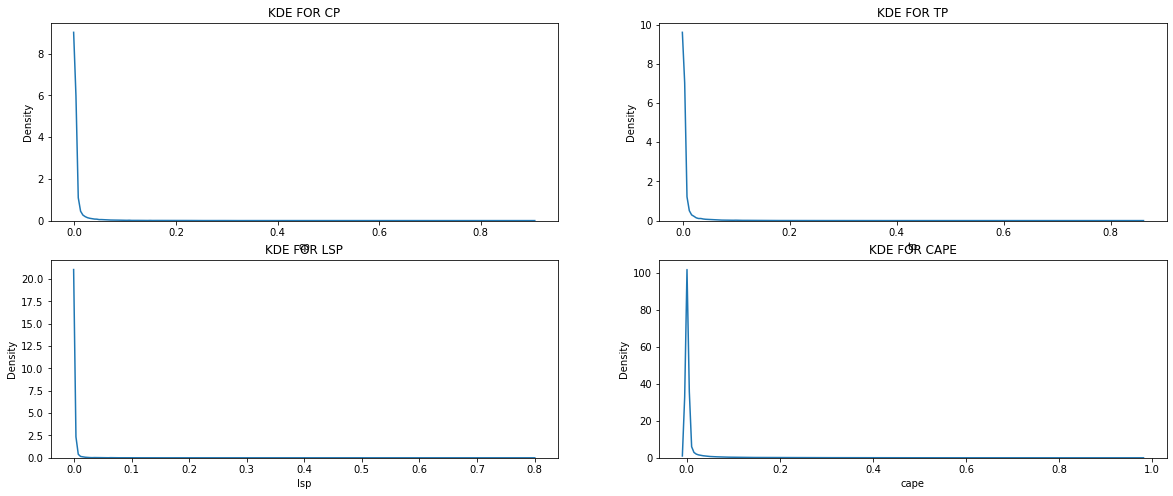

In [27]:
fig,ax=plt.subplots(figsize=(20,8),nrows=2,ncols=2)
sns.kdeplot(DF_SAMPLE["cp"],ax=ax[0,0])
ax[0,0].set_title("KDE FOR CP")
sns.kdeplot(DF_SAMPLE["tp"],ax=ax[0,1])
ax[0,1].set_title("KDE FOR TP")
sns.kdeplot(DF_SAMPLE["lsp"],ax=ax[1,0])
ax[1,0].set_title("KDE FOR LSP")
sns.kdeplot(DF_SAMPLE["cape"],ax=ax[1,1])
ax[1,1].set_title("KDE FOR CAPE")

<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 3.Heatmap </h4>
</div>

In [ ]:
# plt.figure(figsize=(20,8))
# sns.boxplot(DF_S)

<Axes: >

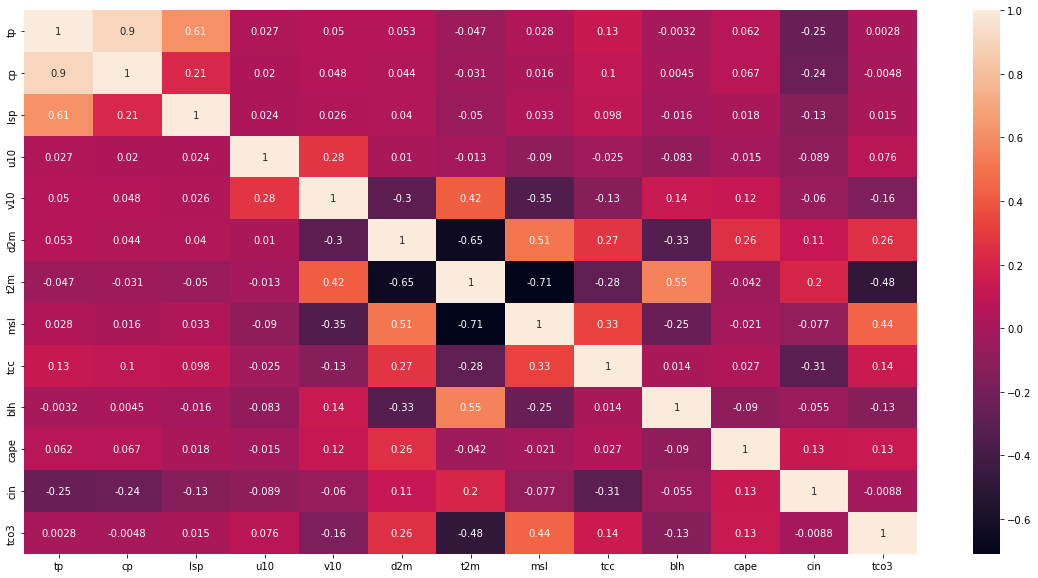

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(DF_S.corr(),annot=True)

<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p>
        <big> Positive correlation :</big> <br>
        <i>&bull; Convective Precipitation and Total Precipitation (0.9)</i> <br>
        <i>&bull; Large Scale Precipitation and Total Precipitation (0.61)</i>. <br>
        <i>&bull; Total Column Ozone and msl (0.44)</i> <br>
        <i>&bull; 2 meter temperature and V10 (0.42)</i> <br>
        <i>&bull; 2 meter temperature and Boundary Layer Height(0.55)</i> <br>
        <big> Negative correlation :</big><br>
        <i>&bull; msl and 2 meter temperature (-0.71)</i><br>
        <i>&bull; Dew point and 2 meter temperature (-0.65)</i><br>
        <i>&bull; Total Column Ozone and 2 meter temperature (-0.48)</i> <br>
    </p>
</div>


<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 3. Clean the Data </h4>
</div>

In [20]:
print("the % of nan in cin is :" , 100*DF.cin.isnull().sum()/len(DF),"%" )

the % of nan in cin is : 94.61751746422023 %


<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p>for the CIN, we found that 95% of cin is nan, so we'll drop this variable insteade of dropping 95% of the dataset
    </p>
</div>


In [21]:
DF.drop(columns="cin",inplace=True)
DF_S.drop(columns="cin",inplace=True)

<div class="note" style="background-color: lightyellow; color: black; padding: 10px;">
  <h4> TASK 3- Features Engineering, Encoding and Data Preprocessing if necessary: </h4>
</div>

<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 1. make time as unique index </h4>
</div>

In [87]:
DF.reset_index(inplace=True)
time=DF.time
DF_S.reset_index(inplace=True)
DF.set_index(DF.time,inplace=True)
DF_S.set_index(DF_S.time,inplace=True)
DF.drop(columns=["time"],inplace=True)
DF_S.drop(columns=["time"],inplace=True)

In [88]:
DF

,latitude,longitude,msl,tcc,blh,cape,tco3,tp,cp,lsp
time,,,,,,,,,,
2024-01-01,40.0,-20.00,101981.25,0.996674,1054.497314,11.75,0.006692,1.025200e-04,1.025200e-04,0.000000e+00
2024-01-01,40.0,-19.75,101987.00,1.000000,1021.559875,10.75,0.006703,2.670288e-05,2.670288e-05,0.000000e+00
2024-01-01,40.0,-19.50,101991.75,1.000000,981.059875,9.25,0.006717,1.907349e-06,2.145767e-06,0.000000e+00
2024-01-01,40.0,-19.25,101995.25,1.000000,925.872375,9.25,0.006729,4.768372e-07,0.000000e+00,4.768372e-07
2024-01-01,40.0,-19.00,101998.25,1.000000,879.059875,9.25,0.006742,5.722046e-06,4.768372e-07,5.245209e-06
...,...,...,...,...,...,...,...,...,...,...
2024-12-17,20.0,2.00,101862.00,0.000000,142.614777,0.00,0.005568,0.000000e+00,0.000000e+00,0.000000e+00
2024-12-17,20.0,2.25,101878.50,0.000000,167.739777,0.00,0.005563,0.000000e+00,0.000000e+00,0.000000e+00
2024-12-17,20.0,2.50,101900.50,0.000000,163.614777,0.00,0.005559,0.000000e+00,0.000000e+00,0.000000e+00


<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 2. Scaling the Data.</h4>
</div>

<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p> the data is already scaled in the EDA part (Min Max Scaler).
    </p>
</div>


<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 3. Date and Time Features.</h4>
</div>

In [101]:
DF["year"] = time.dt.year.values
DF["month"] = time.dt.month.values
DF["day"] = time.dt.day.values

In [102]:
DF

,latitude,longitude,msl,tcc,blh,cape,tco3,tp,cp,lsp,year,month,day
time,,,,,,,,,,,,,
2024-01-01,40.0,-20.00,101981.25,0.996674,1054.497314,11.75,0.006692,1.025200e-04,1.025200e-04,0.000000e+00,2024,1,1
2024-01-01,40.0,-19.75,101987.00,1.000000,1021.559875,10.75,0.006703,2.670288e-05,2.670288e-05,0.000000e+00,2024,1,1
2024-01-01,40.0,-19.50,101991.75,1.000000,981.059875,9.25,0.006717,1.907349e-06,2.145767e-06,0.000000e+00,2024,1,1
2024-01-01,40.0,-19.25,101995.25,1.000000,925.872375,9.25,0.006729,4.768372e-07,0.000000e+00,4.768372e-07,2024,1,1
2024-01-01,40.0,-19.00,101998.25,1.000000,879.059875,9.25,0.006742,5.722046e-06,4.768372e-07,5.245209e-06,2024,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-17,20.0,2.00,101862.00,0.000000,142.614777,0.00,0.005568,0.000000e+00,0.000000e+00,0.000000e+00,2024,12,17
2024-12-17,20.0,2.25,101878.50,0.000000,167.739777,0.00,0.005563,0.000000e+00,0.000000e+00,0.000000e+00,2024,12,17
2024-12-17,20.0,2.50,101900.50,0.000000,163.614777,0.00,0.005559,0.000000e+00,0.000000e+00,0.000000e+00,2024,12,17


<div class="note" style="background-color: lightyellow; color: black; padding: 10px;">
  <h4> TASK 4- Features Selection. </h4>
</div>

<div class="note" style="background-color: lightyellow; color: black; padding: 10px;">
  <h4> TASK 5- Train-Test Splitting: </h4>
</div>

<div class="note" style="background-color: green; color: white; padding: 10px;">
  <h4>HINT : THIS PART IS CORRECTED AFTER THE VERIFICATION OF THE PROFESSOR </h4>
</div>